In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy.stats as stats
import pickle

In [11]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

finalStep = 10

variable_parameters = {"competition": np.linspace(0.1, 0.9, 9)}
parameters = {"data_collect_interval": 1,
              "width": 10, "height": 10,
#              "competition": np.linspace(0.1, 0.9, 9),
              "numAgents": 100,
              "talent_sd": 1,
              "goal_scale": 2,
              "goal_angle": np.pi/4,
              "selection_pressure": 0.1,
              "practice_mutation_rate": np.pi/90,
              "survival_uncertainty": 3} 

In [13]:
agentdata= pickle.load(open("agent_data.pkl", "rb")) 
modeldata = pickle.load(open("model_data.pkl", "rb"))
data_collect_interval = parameters["data_collect_interval"]


''' Full data (agent level)'''
#agentdata = pd.merge(data_pre, collector_data, on="Run")
companydata = agentdata[agentdata["Effort"] == "none"]
agentdata = agentdata[agentdata["Effort"] != "none"]
#agentdata = agentdata.drop("DataCollector", 1)
#agentdata.reset_index(drop=True)
#del agentdata['index']
companydata.reset_index(drop=True)

,competition,Run,DataCollector,data_collect_interval,width,height,numAgents,talent_sd,goal_scale,goal_angle,...,AgentID,Proxy,Goal,Goal_oc,Utility,Effort,Practice,Genealogy,Talent,Type
0,0.1,0,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_0,none,0.759102,none,none,none,none,none,none,company
1,0.1,0,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_1,none,0.440038,none,none,none,none,none,none,company
2,0.1,0,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_2,none,0.338305,none,none,none,none,none,none,company
3,0.1,0,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_3,none,0.127008,none,none,none,none,none,none,company
4,0.1,0,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_4,none,0.054451,none,none,none,none,none,none,company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,0.9,17,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_5,none,0.372808,none,none,none,none,none,none,company
1976,0.9,17,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_6,none,0.206719,none,none,none,none,none,none,company
1977,0.9,17,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_7,none,0.141177,none,none,none,none,none,none,company
1978,0.9,17,<mesa.datacollection.DataCollector object at 0...,1,10,10,100,1,2,0.785398,...,Company_8,none,0.014831,none,none,none,none,none,none,company


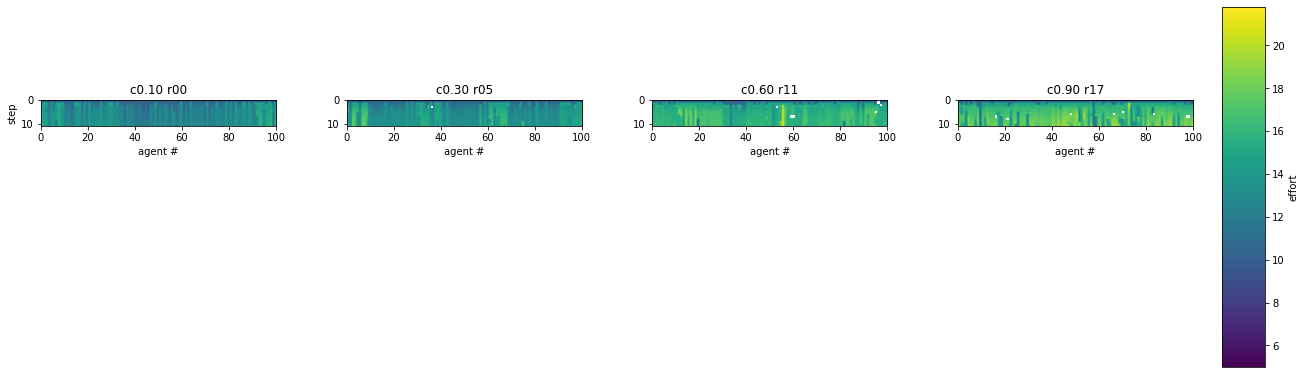

In [19]:
#Agent Dynamics

columns = 4
column_length = 15
if finalStep > 100:
    f1, ax_array = plt.subplots(1, columns, figsize=(2, column_length))
else:
    # column_length = int(len(agentdata.Step.unique())/10)
    f1, ax_array = plt.subplots(1, columns, figsize=(20, 10))
f1.subplots_adjust(hspace=.3, wspace=.3, left=0.1, right=0.9)
cbar_ax = f1.add_axes([0.92, 0.15, 0.03, 0.5])
cNorm = colors.Normalize(vmin=np.min(agentdata.Effort),
                         vmax=np.max(agentdata.Effort))

for i, ax in enumerate(ax_array):
    if i == 0:
        ax.set_ylabel('step')
    else:
        ax.tick_params(labelleft='off')
    run = int(i * (max(agentdata.Run)+1)/(columns-0.9))
    run_data = agentdata[agentdata.Run == run]
    image = np.empty((len(run_data.Step.unique()),
                      len(run_data.AgentID.unique())))
    births = np.zeros((len(run_data.Step.unique()),
                      len(run_data.AgentID.unique())))
    for row, Step in enumerate(run_data.Step.unique()):
        stepdata = run_data[run_data.Step == Step]
        sortby = 'AgentID'
        image[row] = np.array(stepdata.sort_values(sortby)['Effort'])
        births[row] = np.array(stepdata.sort_values(sortby)['Genealogy'])
        if Step == max(run_data.Step.unique()):
            break
    births = np.gradient(births, axis=0)
    births = (births != 0)*1
    births = np.ma.masked_where(births < 0.9, births)

    ax.imshow(image, cmap="viridis", norm=cNorm,
              extent=(0, max(run_data.AgentID.unique()),
                      max(run_data.Step.unique()), 0),
              aspect=1/data_collect_interval)
    ax.imshow(births, cmap="Greys",
              extent=(0, max(run_data.AgentID.unique()),
                      max(run_data.Step.unique()), 0),
              aspect=1/data_collect_interval, alpha=0.95)

    ax.set_xlabel('agent #')
    variable = run_data.competition.iloc[0]
    ax.set_title('c{:.2f} r{:02d}'.format(variable, run))

mpl.colorbar.ColorbarBase(cbar_ax, norm=cNorm, orientation='vertical',
                          label='effort')

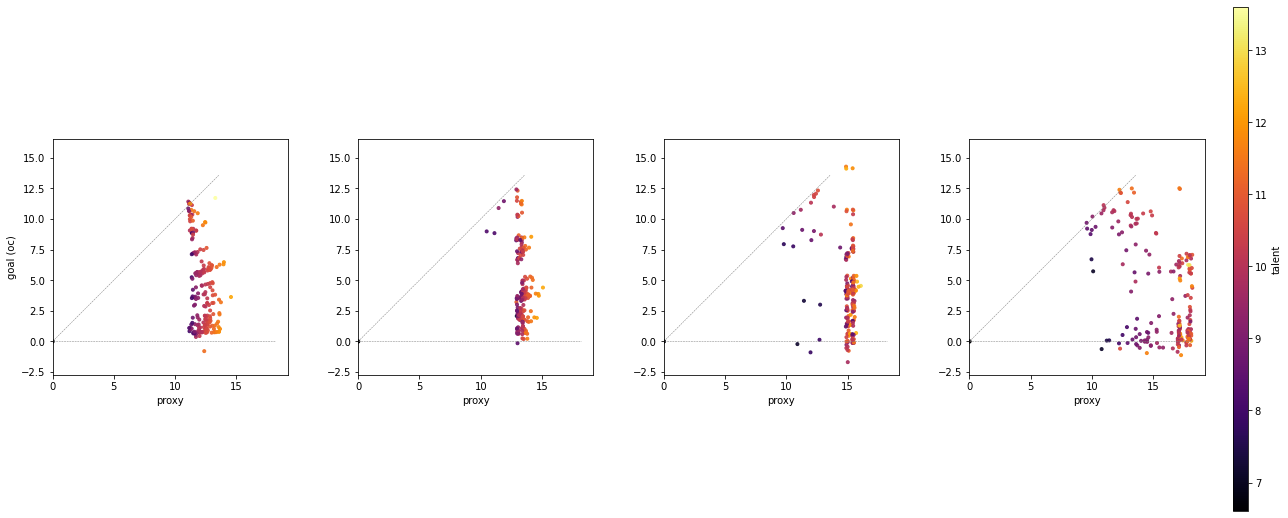

In [23]:
""" individual Agent outcomes """
columns = 4
f2, ax_array = plt.subplots(1, columns, figsize=(20, 10), sharey=True)
f2.subplots_adjust(hspace=.3, wspace=.3, left=0.1, right=0.9)
cmap = plt.cm.inferno
cbar_ax = f2.add_axes([0.92, 0.15, 0.01, 0.7])
cNorm = colors.Normalize(vmin=np.min(agentdata.Talent),
                         vmax=np.max(agentdata.Talent))

visualizeStep = max(agentdata.Step.unique())
for i, ax in enumerate(ax_array):
    if i == 0:
        ax.set_ylabel('goal (oc)')
    else:
        ax.tick_params(labelleft='off')
    ''' get practice angles '''
    run = int(i * (max(agentdata.Run)+1)/(columns-0.9))
    goal_angle = agentdata[agentdata.Run == run].goal_angle.iloc[0]
    competition = agentdata[agentdata.Run == run].competition.iloc[0]
    competition_data = agentdata[agentdata.competition == competition]
    proxy = np.zeros([len(competition_data.AgentID.unique()),
                     len(competition_data.Run.unique())])
    goal_oc = np.zeros([len(competition_data.AgentID.unique()),
                       len(competition_data.Run.unique())])
    talent = np.zeros([len(competition_data.AgentID.unique()),
                      len(competition_data.Run.unique())])
    runcolor = np.zeros([len(competition_data.AgentID.unique()),
                         len(competition_data.Run.unique())])
    for index, iteration in enumerate(competition_data.Run.unique()):
        for Agent in competition_data.AgentID.unique():
            try: 
                proxy[Agent][index] = competition_data[(competition_data.Run == iteration) & (competition_data.Step == visualizeStep)].Proxy.iloc[Agent]    
                goal_oc[Agent][index] = competition_data[(competition_data.Run == iteration) & (competition_data.Step == visualizeStep)].Goal_oc.iloc[Agent]
                talent[Agent][index] = competition_data[(competition_data.Run == iteration) & (competition_data.Step == visualizeStep)].Talent.iloc[Agent]
                runcolor[Agent][index] = index
            except: 
                pass
    ''' determine plot range '''
    xub = np.max(agentdata.Proxy) + 1
    xlb = np.min(agentdata.Proxy) - 1
    yub = np.max(agentdata.Goal_oc) + 1
    ylb = np.min(agentdata.Goal_oc) - 1
    xlb = 0 if xlb > 0 else xlb
    ylb = 0 if ylb > 0 else ylb

    ''' plot goal angle '''
    ax.plot([0, np.cos(goal_angle)*max(xub, yub)],
            [0, np.sin(goal_angle)*max(xub, yub)],
            c='grey', ls='--', lw=0.5)
    ax.plot([0, np.max(agentdata.Proxy)],
            [0, 0],
            c='grey', ls='--', lw=0.5)
    ax.scatter(proxy, goal_oc, c=talent, cmap=cmap, norm=cNorm,
               alpha=0.9, marker=".")
    if (xub-xlb) > (yub-ylb):
        ax.set_xlim([xlb, xub])
        ax.set_ylim([ylb, ylb+xub-xlb])
    else:
        ax.set_ylim([ylb, yub])
        ax.set_xlim([xlb, xlb+yub-ylb])
    ax.set_aspect('equal')
    ax.set_xlabel('proxy')
mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=cNorm,
                          orientation='vertical', label='talent')

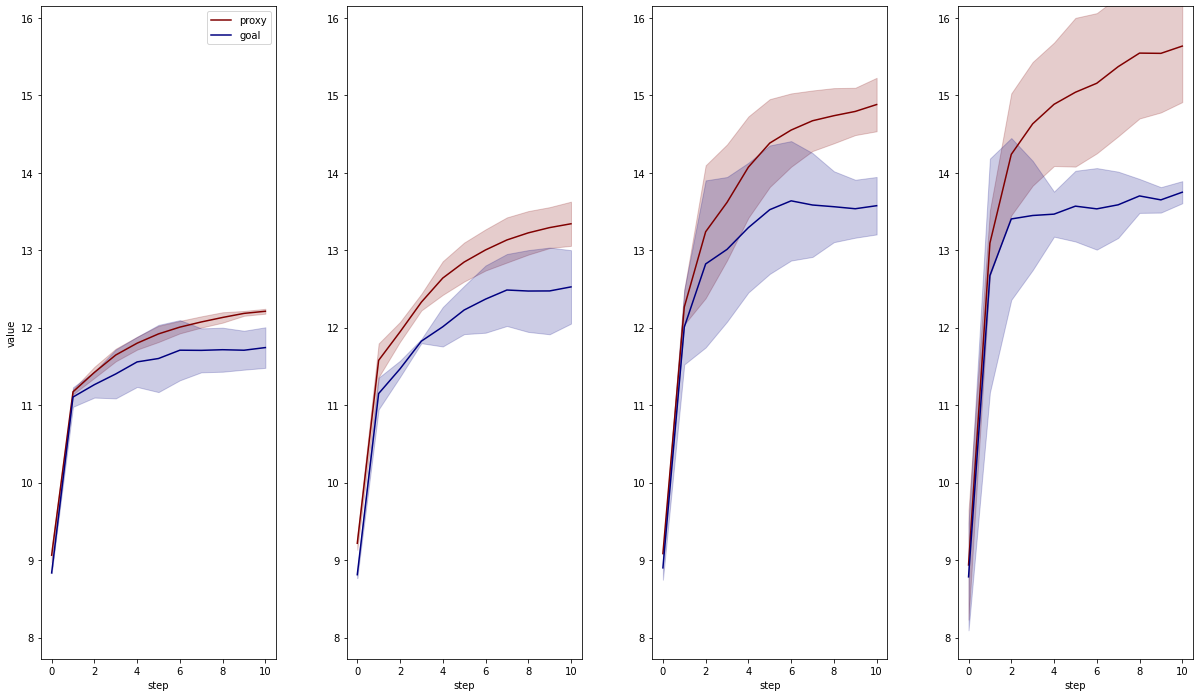

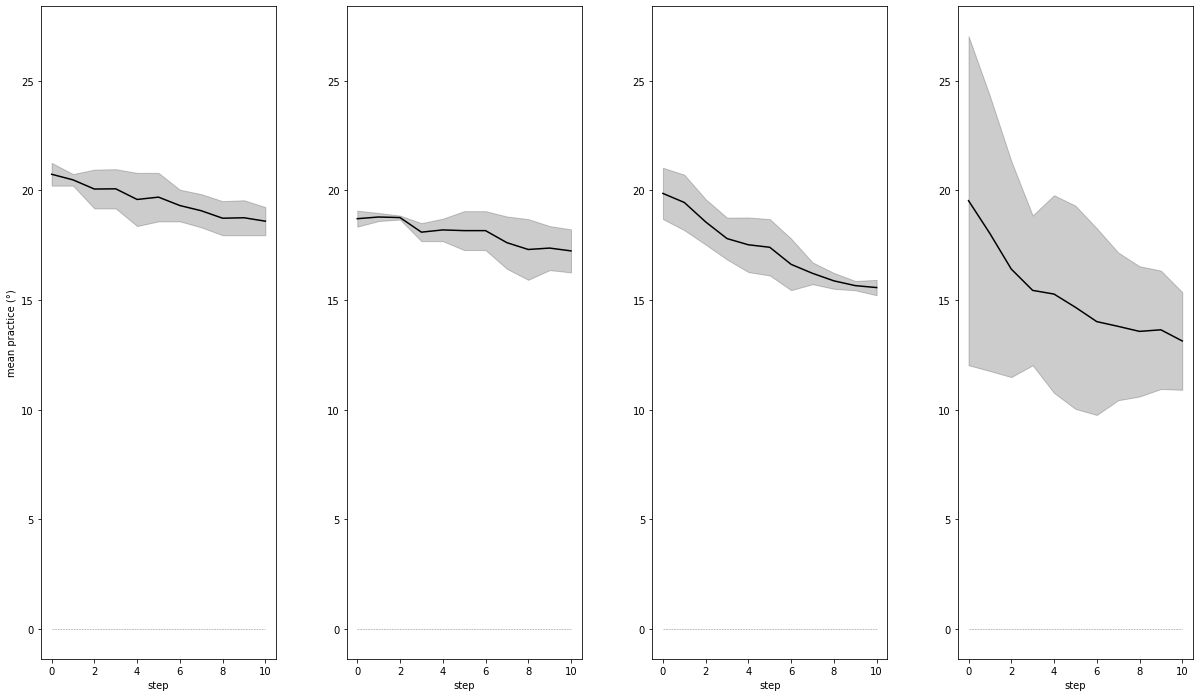

In [28]:
columns = 4
f1, ax_array = plt.subplots(1, columns, figsize=(20, 12), sharey=True)
f1.subplots_adjust(hspace=.3, wspace=.3, left=0.1, right=0.9)
''' colormap '''
cmap = plt.cm.jet
cNorm = colors.Normalize(vmin=np.min(modeldata.competition),
                     vmax=np.max(modeldata.competition))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
low_col = scalarMap.to_rgba(np.min(modeldata.competition))
high_col = scalarMap.to_rgba(np.max(modeldata.competition))

for i, ax in enumerate(ax_array):
    if i == 0:
        ax.set_ylabel('value')
    else:
        ax.tick_params(labelleft='off')
    run = int(i * (max(modeldata.Run)+1)/(columns-0.9))
    competition = modeldata[modeldata.Run == run].competition.iloc[0]
    competition_data = modeldata[modeldata.competition == competition]

    xVals = competition_data.Step.unique()
    proxy_mean = competition_data.groupby(['Step'])['mean_proxy_value'].mean()
    proxy_std = competition_data.groupby(['Step'])['mean_proxy_value'].std()
    # ax.scatter(competition_data.Step,
    #           competition_data.mean_proxy_value,
    #           alpha=0.2, c=high_col, marker=".", label='_nolegend_')
    ax.plot(xVals, proxy_mean, c=high_col, label='proxy')
    ax.fill_between(xVals, proxy_mean - proxy_std,
                    proxy_mean + proxy_std, alpha=0.2, color=high_col)
    goal_mean = competition_data.groupby(['Step'])['mean_goal_value'].mean()
    goal_std = competition_data.groupby(['Step'])['mean_goal_value'].std()
    # ax.scatter(competition_data.Step,
    #           competition_data.mean_goal_value,
    #           alpha=0.2, c=low_col, marker=".", label='_nolegend_')
    ax.plot(xVals, goal_mean, c=low_col, label='goal')
    ax.fill_between(xVals, goal_mean - goal_std,
                    goal_mean + goal_std, alpha=0.2, color=low_col)
    ax.set_xlabel('step')
    # ax.set_title('c{:.1f} r{:02d}'.format(competition, run))
    ax.set_ylim([np.min([modeldata.mean_proxy_value.min(),
                         modeldata.mean_goal_value.min()]),
                 np.max([modeldata.mean_proxy_value.max(),
                         modeldata.mean_goal_value.max()])])
    if i == 0:
        ax.legend()


f2, ax_array = plt.subplots(1, columns, figsize=(20,12), sharey=True)
f2.subplots_adjust(hspace=.3, wspace=.3, left=0.1, right=0.9)
for i, ax in enumerate(ax_array):
    if i == 0:
        ax.set_ylabel('mean practice (°)')
    else:
        ax.tick_params(labelleft='off')
    run = int(i * (max(modeldata.Run)+1)/(columns-0.9))
    competition = modeldata[modeldata.Run == run].competition.iloc[0]
    #        print(competition/np.pi * 180)
    competition_data = modeldata[modeldata.competition == competition]
    xVals = competition_data.Step.unique()
    yVals_raw = competition_data.groupby(['Step'])['mean_practice']
    practice_mean = np.empty(np.size(xVals))
    practice_std = np.empty(np.size(xVals))
    i = 0
    for name, group in yVals_raw:
        practice_mean[i] = stats.circmean(group, -np.pi, np.pi)
        practice_std[i] = stats.circstd(group, -np.pi, np.pi)
        i += 1

    practice_mean = practice_mean / np.pi * 180
    practice_std = practice_std / np.pi * 180
    #        ax.scatter(competition_data.Step,
    #                   competition_data.mean_practice,
    #                   alpha=0.2, c="k", marker=".")
    ax.plot(xVals, practice_mean, c='k')
    ax.fill_between(xVals, practice_mean - practice_std,
                    practice_mean + practice_std, alpha=0.2, color="k")
    ax.plot([0, np.max(xVals)],
            [0, 0],
            c='grey', ls='--', lw=0.5)
    ax.set_xlabel('step')
# ax.set_ylim([0,1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


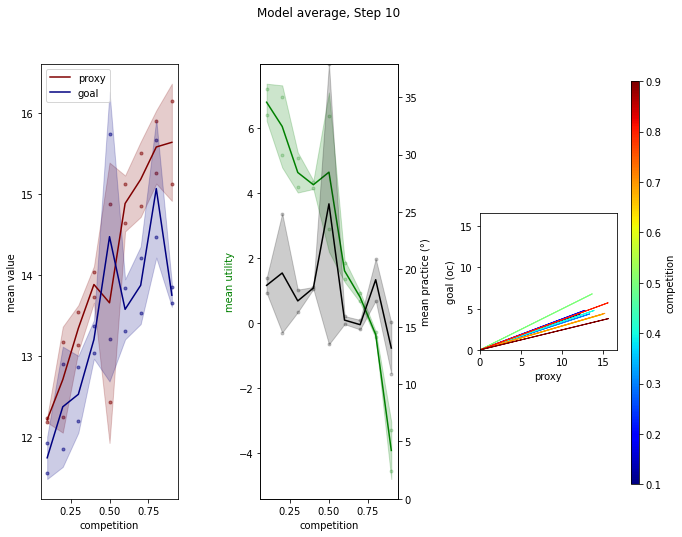

In [33]:
#ShowModel

""" model vizualizations (particular timestep)"""
 
visualizeStep = max(modeldata.Step.unique())
f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10, 8))
f.subplots_adjust(hspace=.3, wspace=.6, left=0.1, right=0.9)
plt.suptitle('Model average, Step ' + str(visualizeStep))

modeldata = modeldata[modeldata.Step == visualizeStep]
''' colormap '''
cmap = plt.cm.jet
cNorm = colors.Normalize(vmin=np.min(modeldata.competition),
                         vmax=np.max(modeldata.competition))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
low_col = scalarMap.to_rgba(min(modeldata.competition))
high_col = scalarMap.to_rgba(max(modeldata.competition))

''' compute means & std '''
xVals = modeldata.competition.unique()
Gm = modeldata.groupby(['competition'])['mean_goal_value'].mean()
Gstd = modeldata.groupby(['competition'])['mean_goal_value'].std()
Pm = modeldata.groupby(['competition'])['mean_proxy_value'].mean()
Pstd = modeldata.groupby(['competition'])['mean_proxy_value'].std()

ax1.scatter(modeldata.competition, modeldata.mean_goal_value,
            alpha=0.5, c=low_col, marker=".", label='_nolegend_')
ax1.scatter(modeldata.competition, modeldata.mean_proxy_value,
            alpha=0.5, c=high_col, marker=".", label='_nolegend_')
ax1.plot(xVals, Pm, color=high_col, label='proxy')
ax1.fill_between(xVals, Pm-Pstd, Pm+Pstd, color=high_col, alpha=0.2)
ax1.plot(xVals, Gm, color=low_col, label='goal')
ax1.fill_between(xVals, Gm-Gstd, Gm+Gstd, color=low_col, alpha=0.2)

ax1.legend()
ax1.set_ylabel('mean value')
ax1.set_xlabel('competition')

utility_mean = modeldata.groupby(['competition'])['mean_utility'].mean()
utility_std = modeldata.groupby(['competition'])['mean_utility'].std()
ax2.scatter(modeldata.competition, modeldata.mean_utility,
            alpha=0.2, c='g', marker=".", label='iterations')
ax2.plot(xVals, utility_mean, c='g')
ax2.fill_between(xVals, utility_mean-utility_std,
                 utility_mean+utility_std, alpha=0.2, color='g')
ax2.set_ylabel('mean utility', color='g')
ax2.set_xlabel('competition')

groups_m = modeldata.groupby(['competition'])['mean_practice']
practice_mean = np.zeros(len(list(variable_parameters.values())[0]))
i = 0
for name, group in groups_m:
    practice_mean[i] = stats.circmean(group, -np.pi, np.pi)
    i += 1
groups_std = modeldata.groupby(['competition'])['mean_practice']
practice_std = np.zeros(len(list(variable_parameters.values())[0]))
i = 0
for name, group in groups_std:
    practice_std[i] = stats.circstd(group, -np.pi, np.pi)
    i += 1
practice_mean = practice_mean/np.pi*180
practice_std = practice_std/np.pi*180
ax2a = ax2.twinx()
ax2a.scatter(modeldata.competition,
             modeldata.mean_practice/np.pi*180,
             alpha=0.2, c='k', marker=".", label='iterations')
ax2a.plot(xVals, practice_mean, c='k')
ax2a.fill_between(xVals, practice_mean-practice_std,
                  practice_mean+practice_std, alpha=0.2, color='k')
ax2a.set_ylim([0, max(modeldata.mean_practice/np.pi*180)])
ax2a.set_ylabel('mean practice (°)')

''' vector plot '''
G_oc_m = modeldata.groupby(['competition'])['mean_goal_oc'].mean()
ax3.set_ylabel('goal (oc)')
ax3.set_xlabel('proxy')

for i in range(len(xVals)):
    colorVal = scalarMap.to_rgba(xVals[i])
    ax3.arrow(0, 0, Pm.values[i], G_oc_m.values[i], color=colorVal)

ax3.set_ylim([0, np.max(Pm)+1])
ax3.set_xlim([0, np.max(Pm)+1])
ax3.set_aspect('equal')
cbar_ax = f.add_axes([0.92, 0.15, 0.01, 0.7])
mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=cNorm,
                          orientation='vertical', label='competition')
